In [268]:
import os

import numpy as np
import pandas as pd
import json
import cv2
import sklearn
from skimage import io
from sklearn.model_selection import train_test_split
import cv2

# tf imports
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras import backend as K




In [269]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2101224702064647311
xla_global_id: -1
]


loading images with labels

In [270]:
f = open("C:\school\minor-ai\lettuce-cnn\data\measurements.json")
data_json = json.loads(f.read())["Measurements"]

vs = data_json.values()

df = pd.json_normalize(vs)

df.head()


,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea
0,Lugano,RGB_27.png,Depth_27.png,5.5,0.42,9.0,11.0,153.9
1,Lugano,RGB_79.png,Depth_79.png,30.3,1.92,8.8,20.2,582.3
2,Lugano,RGB_140.png,Depth_140.png,60.9,2.83,11.6,19.0,960.6
3,Lugano,RGB_203.png,Depth_203.png,112.0,5.76,11.0,22.0,1614.9
4,Lugano,RGB_292.png,Depth_292.png,372.6,14.17,17.0,32.0,3839.6


In [271]:
df.sort_values("Height")

,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea
248,Lugano,RGB_9.png,Depth_9.png,2.5,0.10,4.3,9.8,72.2
338,Aphylion,RGB_17.png,Depth_17.png,2.8,0.12,5.0,14.5,67.2
234,Salanova,RGB_10.png,Depth_10.png,1.4,0.09,5.1,13.0,57.6
219,Aphylion,RGB_15.png,Depth_15.png,3.2,0.16,5.1,16.1,87.6
111,Satine,RGB_61.png,Depth_61.png,3.3,0.24,5.2,13.0,89.0
...,...,...,...,...,...,...,...,...
55,Aphylion,RGB_347.png,Depth_347.png,444.7,17.24,24.0,34.5,4995.6
247,Aphylion,RGB_362.png,Depth_362.png,336.0,13.53,24.0,39.0,4429.8
54,Aphylion,RGB_346.png,Depth_346.png,364.8,14.69,24.5,33.0,4516.2
321,Aphylion,RGB_343.png,Depth_343.png,406.0,15.97,25.0,30.0,5379.9


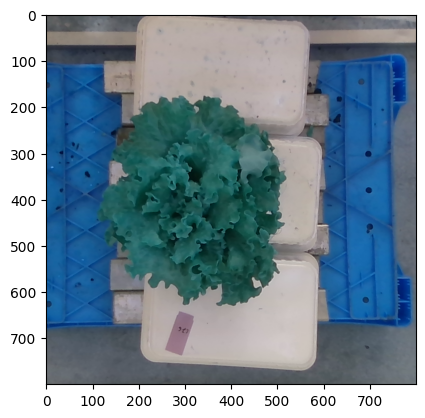

In [272]:
# testing images shaping
img = cv2.imread('C:\school\minor-ai\lettuce-cnn\data\RGBImages\RGB_270.png')
w, h, c = img.shape

img = img[ (w // 2 - 400 ) : (w // 2 + 400) , (h // 2 - 400 + 100)  : (h // 2 + 400 + 100) ]
plt.imshow(img)

In [273]:

path = "./data/DepthImages/"
all_images = []
y = []
for image_path in os.listdir(path):
    y.append(df.loc[df['Depth_Information'] == image_path].Height.item())
    img = cv2.imread(path + image_path, -1)
    img = img[ (w // 2 - 400 ) : (w // 2 + 400) , (h // 2 - 400 + 100)  : (h // 2 + 400 + 100) ]
    all_images.append(img)
print(y)
X = np.array(all_images)


[8.2, 5.1, 7.1, 6.5, 7.0, 6.5, 6.6, 8.7, 8.6, 7.3, 8.1, 8.2, 5.6, 7.8, 10.3, 8.4, 7.5, 7.0, 9.2, 6.0, 6.8, 7.0, 7.5, 7.1, 7.1, 6.2, 7.5, 7.9, 8.0, 8.4, 8.8, 7.0, 7.8, 8.5, 10.1, 8.4, 8.7, 11.6, 10.8, 9.3, 10.6, 9.8, 12.9, 10.1, 8.9, 5.6, 11.6, 12.0, 11.2, 10.6, 11.5, 13.3, 10.4, 13.7, 11.3, 11.0, 5.1, 11.3, 9.0, 11.3, 12.5, 12.1, 11.3, 13.1, 12.8, 11.0, 13.2, 9.6, 12.2, 10.3, 12.5, 9.8, 13.4, 13.5, 13.9, 11.3, 13.1, 13.5, 5.0, 11.0, 12.4, 9.5, 12.4, 12.0, 14.5, 12.3, 12.1, 15.0, 11.2, 6.2, 12.0, 11.3, 9.2, 11.8, 10.6, 10.0, 10.3, 9.8, 11.9, 12.1, 5.4, 10.8, 9.5, 11.3, 9.0, 9.4, 12.0, 11.0, 12.0, 11.0, 13.0, 8.5, 8.5, 12.0, 13.0, 14.0, 11.0, 12.0, 13.0, 13.0, 10.0, 9.0, 8.0, 7.9, 12.0, 12.0, 8.0, 14.0, 9.0, 10.5, 10.0, 11.0, 11.0, 15.0, 5.4, 14.0, 17.0, 16.0, 15.0, 12.0, 14.0, 16.0, 16.5, 16.0, 11.0, 8.5, 11.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 13.0, 13.0, 7.8, 11.0, 16.0, 17.5, 13.0, 16.4, 17.0, 15.0, 13.5, 15.0, 14.8, 6.5, 15.5, 13.5, 12.9, 11.1, 14.0, 15.8, 16.5, 12.1, 15.5, 

In [275]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [276]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [277]:


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(800, 800, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss="mean_squared_error", optimizer="adam", metrics=[r2_keras])
model.summary()
# mean squared error
# mean absolute error percentage
# r2 score

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 798, 798, 32)      320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 399, 399, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 397, 397, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 198, 198, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 196, 196, 64)      36928     
                                                                 
 dense_6 (Dense)             (None, 196, 196, 1)      

In [2]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=30,
          verbose=2,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)

NameError: name 'np' is not defined

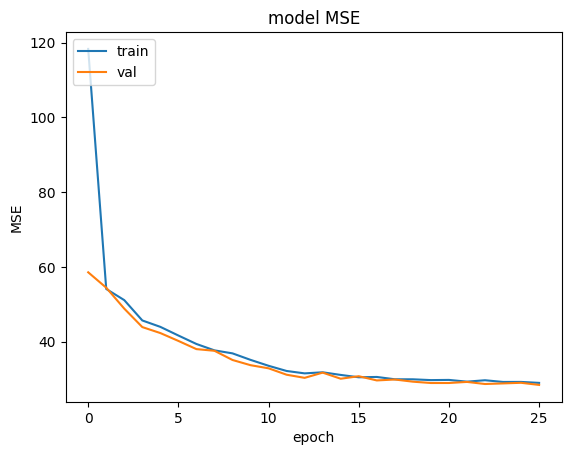

In [286]:
plt.plot(history.history['loss'][4 : ])
plt.plot(history.history['val_loss'][4: ])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.predict([X_train[0]])